In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("week2.csv", header=None)
print(df.head())
X1 = df.iloc[:,0]
X2 = df.iloc[:,1]

X = np.column_stack((X1,X2))
y = df.iloc[:,2]

      0     1  2
0  0.63  0.90  1
1 -0.64 -0.14  1
2  0.90  0.07  1
3  0.96 -0.76  1
4  0.76 -0.64  1


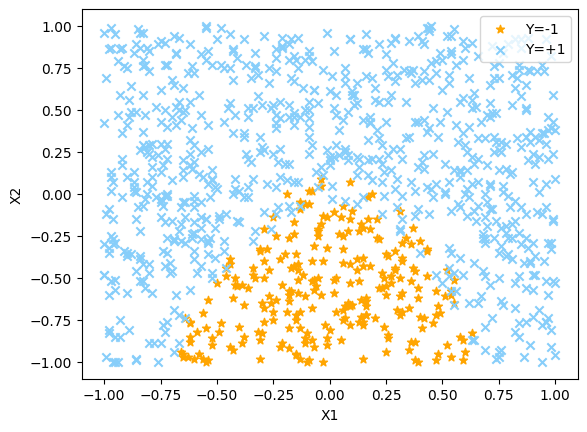

In [ ]:
# a(i)
import matplotlib.pyplot as plt
# negatives = plt.scatter(X1[y<0],X2[y<0], marker='o', color='red',label='Y=-1')
# positives = plt.scatter(X1[y>0],X2[y>0], marker='x', color='green', label='Y=+1')
negatives = plt.scatter(X1[y<0],X2[y<0], marker='*', color='orange',label='Y=-1')
positives = plt.scatter(X1[y>0],X2[y>0], marker='x', color='lightskyblue', label='Y=+1')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=[negatives,positives], loc="upper right")


In [ ]:
# a(ii)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty=None)
logreg.fit(X,y)
print("Intercept -> ", logreg.intercept_)
print("Coefficients -> ", logreg.coef_)
predictions = logreg.predict(X)
# predictions
accuracy = (predictions == y).mean()
print("Accuracy : " ,accuracy)

Intercept ->  [2.02871098]
Coefficients ->  [[3.37053745e-03 3.84563071e+00]]
Accuracy :  0.8218218218218218


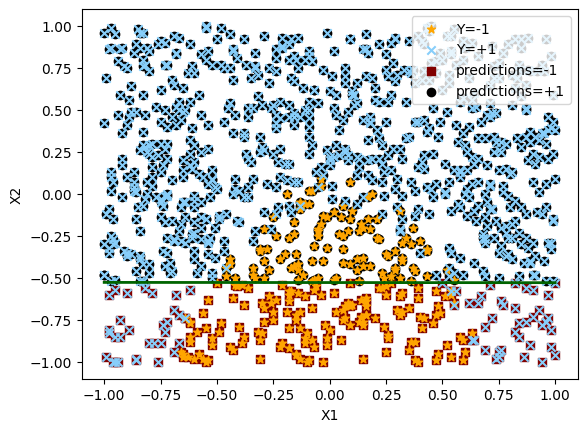

In [ ]:
# a(iii)

y_predict = logreg.predict(X)
predict_N = plt.scatter(X1[y_predict<0],X2[y_predict<0], marker='s', color='maroon',label='predictions=-1')
predict_P = plt.scatter(X1[y_predict>0],X2[y_predict>0], marker='o', color='black', label='predictions=+1')

input_N = plt.scatter(X1[y<0],X2[y<0], marker='*', color='orange',label='Y=-1')
input_P = plt.scatter(X1[y>0],X2[y>0], marker='x', color='lightskyblue', label='Y=+1')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=[input_N,input_P, predict_N, predict_P], loc="upper right")

b = logreg.intercept_
w1, w2 = logreg.coef_[0]

m = - (w1/w2)
c = - (b/w2)
# print("slope - " , m)


x1_range = np.array([X1.min(),X1.max()])
corresponding_x2 = m*x1_range + c
# print("corresponding_x2 - " , corresponding_x2)


plt.plot(x1_range,corresponding_x2 , c="darkgreen",lw=2)
plt.show()

In [ ]:
# b(i)
from sklearn.svm import LinearSVC as svc

svc1 = svc(C=0.001).fit(X,y)
svc3 = svc(C=0.1).fit(X,y)
svc4 = svc(C=1).fit(X,y)
svc5 = svc(C=100).fit(X,y)
print("When C=0.001 -> ","Intercept : ",svc1.intercept_ ,"Coefficients : ", svc1.coef_ )
print("When C=0.1   -> ","Intercept : ",svc3.intercept_ ,"Coefficients : ", svc3.coef_ )
print("When C=1     -> ","Intercept : ",svc4.intercept_ ," Coefficients : ", svc4.coef_ )
print("When C=100   -> ","Intercept : ",svc5.intercept_ ,"Coefficients : ", svc5.coef_ )
print("------------------------------------------------------------")

# Calculating Accuracy
predict = svc1.predict(X)
print("When C=0.001 -> ","Accuracy : ",(predict == y).mean())
predict = svc3.predict(X)
print("When C=0.1   -> ","Accuracy : ",(predict == y).mean())
predict = svc4.predict(X)
print("When C=1     -> ","Accuracy : ",(predict == y).mean())
predict = svc5.predict(X)
print("When C=100   -> ","Accuracy : ",(predict == y).mean())

When C=0.001 ->  Intercept :  [0.32992226] Coefficients :  [[0.00112062 0.34625132]]
When C=0.1   ->  Intercept :  [0.65695954] Coefficients :  [[-0.00279709  1.2533749 ]]
When C=1     ->  Intercept :  [0.6885337]  Coefficients :  [[-0.00291764  1.33082951]]
When C=100   ->  Intercept :  [0.69256843] Coefficients :  [[-0.00292697  1.34050896]]
------------------------------------------------------------
When C=0.001 ->  Accuracy :  0.7507507507507507
When C=0.1   ->  Accuracy :  0.8218218218218218
When C=1     ->  Accuracy :  0.8198198198198198
When C=100   ->  Accuracy :  0.8198198198198198


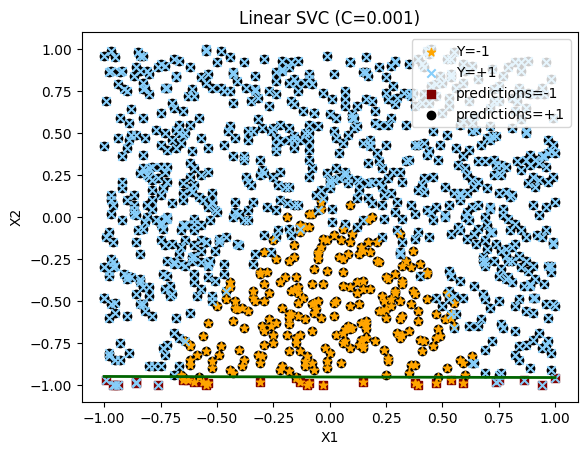

In [ ]:
# B(ii)
# C = 0.001 graph

y_predict = svc1.predict(X)
predict_N = plt.scatter(X1[y_predict<0],X2[y_predict<0], marker='s', color='maroon',label='predictions=-1')
predict_P = plt.scatter(X1[y_predict>0],X2[y_predict>0], marker='o', color='black', label='predictions=+1')

input_N = plt.scatter(X1[y<0],X2[y<0], marker='*', color='orange',label='Y=-1')
input_P = plt.scatter(X1[y>0],X2[y>0], marker='x', color='lightskyblue', label='Y=+1')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=[input_N,input_P, predict_N, predict_P], loc="upper right")

b = svc1.intercept_
w1, w2 = svc1.coef_[0]

m = - (w1/w2)
c = - (b/w2)

x1_range = np.array([X1.min(),X1.max()])
corresponding_x2 = m*x1_range + c

plt.plot(x1_range,corresponding_x2 , c="darkgreen",lw=2)
plt.title("Linear SVC (C=0.001)")
plt.show()


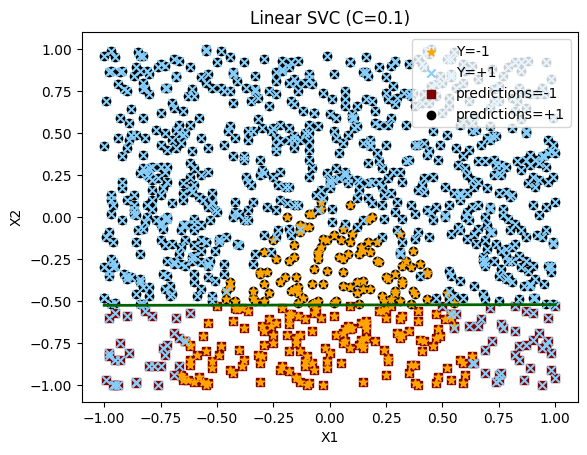

In [ ]:
# B(ii)
# C = 0.1

y_predict = svc3.predict(X)
predict_N = plt.scatter(X1[y_predict<0],X2[y_predict<0], marker='s', color='maroon',label='predictions=-1')
predict_P = plt.scatter(X1[y_predict>0],X2[y_predict>0], marker='o', color='black', label='predictions=+1')

input_N = plt.scatter(X1[y<0],X2[y<0], marker='*', color='orange',label='Y=-1')
input_P = plt.scatter(X1[y>0],X2[y>0], marker='x', color='lightskyblue', label='Y=+1')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=[input_N,input_P, predict_N, predict_P], loc="upper right")

b = svc3.intercept_
w1, w2 = svc3.coef_[0]

m = - (w1/w2)
c = - (b/w2)
# print("slope - " , m)

x1_range = np.array([X1.min(),X1.max()])
corresponding_x2 = m*x1_range + c
# print("corresponding_x2 - " , corresponding_x2)

plt.plot(x1_range,corresponding_x2 , c="darkgreen",lw=2)
plt.title("Linear SVC (C=0.1)")
plt.show()


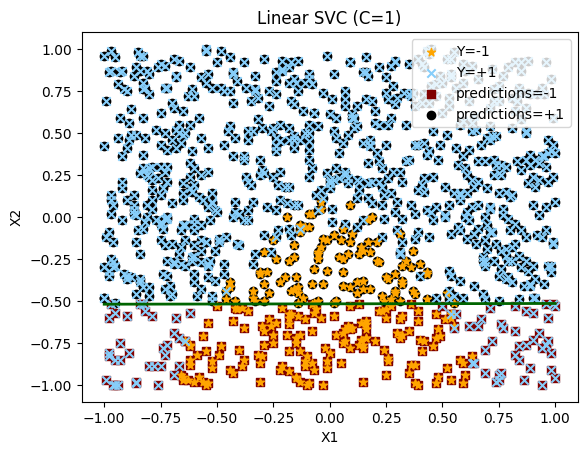

In [ ]:
# B(ii)
# C = 1 graph

y_predict = svc4.predict(X)
predict_N = plt.scatter(X1[y_predict<0],X2[y_predict<0], marker='s', color='maroon',label='predictions=-1')
predict_P = plt.scatter(X1[y_predict>0],X2[y_predict>0], marker='o', color='black', label='predictions=+1')

input_N = plt.scatter(X1[y<0],X2[y<0], marker='*', color='orange',label='Y=-1')
input_P = plt.scatter(X1[y>0],X2[y>0], marker='x', color='lightskyblue', label='Y=+1')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=[input_N,input_P, predict_N, predict_P], loc="upper right")

b = svc4.intercept_
w1, w2 = svc4.coef_[0]

m = - (w1/w2)
c = - (b/w2)
# print("slope - " , m)

x1_range = np.array([X1.min(),X1.max()])
corresponding_x2 = m*x1_range + c
# print("corresponding_x2 - " , corresponding_x2)

plt.plot(x1_range,corresponding_x2 , c="darkgreen",lw=2)
plt.title("Linear SVC (C=1)")
plt.show()


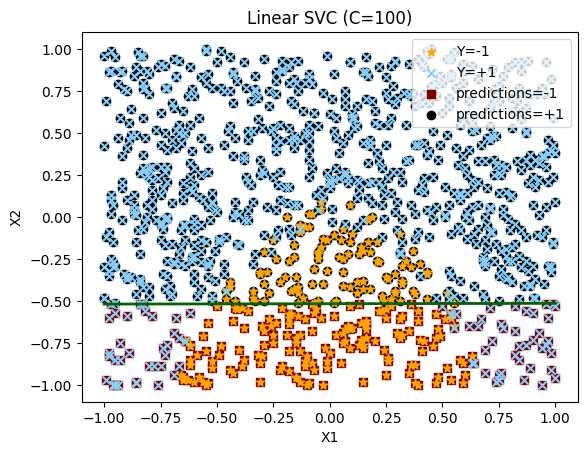

In [ ]:
# B(ii)
# C = 100 graph

y_predict = svc5.predict(X)
predict_N = plt.scatter(X1[y_predict<0],X2[y_predict<0], marker='s', color='maroon',label='predictions=-1')
predict_P = plt.scatter(X1[y_predict>0],X2[y_predict>0], marker='o', color='black', label='predictions=+1')

input_N = plt.scatter(X1[y<0],X2[y<0], marker='*', color='orange',label='Y=-1')
input_P = plt.scatter(X1[y>0],X2[y>0], marker='x', color='lightskyblue', label='Y=+1')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=[input_N,input_P, predict_N, predict_P], loc="upper right")

b = svc5.intercept_
w1, w2 = svc5.coef_[0]

m = - (w1/w2)
c = - (b/w2)
# print("slope - " , m)

x1_range = np.array([X1.min(),X1.max()])
corresponding_x2 = m*x1_range + c
# print("corresponding_x2 - " , corresponding_x2)

plt.plot(x1_range,corresponding_x2 , c="darkgreen",lw=2)
plt.title("Linear SVC (C=100)")
plt.show()


In [ ]:
# c(i)
X3 = X1*X1
X4 = X2*X2

X_extraF = np.column_stack((X,X3,X4))

LRmodel = LogisticRegression()
LRmodel.fit(X_extraF,y)
print("Intercept -> ", LRmodel.intercept_)
print("Coefficients -> ", LRmodel.coef_)



Intercept ->  [0.42026481]
Coefficients ->  [[0.01169035 5.5201553  8.12152714 0.49224507]]


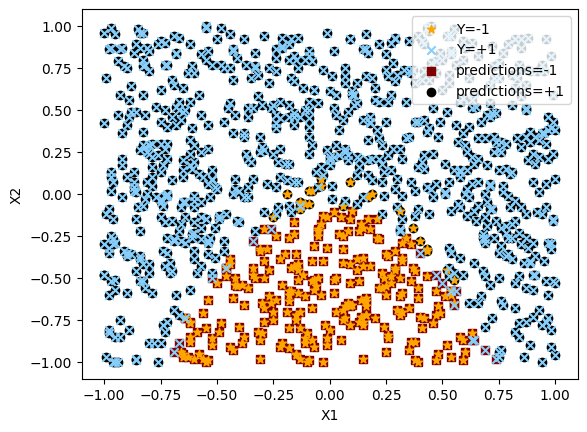

In [ ]:
# c(ii)
new_predict = LRmodel.predict(X_extraF)

predict_N = plt.scatter(X1[new_predict<0],X2[new_predict<0], marker='s', color='maroon',label='predictions=-1')
predict_P = plt.scatter(X1[new_predict>0],X2[new_predict>0], marker='o', color='black', label='predictions=+1')
input_N = plt.scatter(X1[y<0],X2[y<0], marker='*', color='orange',label='Y=-1')
input_P = plt.scatter(X1[y>0],X2[y>0], marker='x', color='lightskyblue', label='Y=+1')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=[input_N,input_P, predict_N, predict_P], loc="upper right")

plt.show()

In [ ]:
# c(iii)

baseline = max((y == -1).mean(),(y == 1).mean())
print("Baseline Predictor Accuracy - " , baseline)

accuracy = (new_predict == y).mean()
print("4 Feature Model Accuracy - " ,accuracy)

Baseline Predictor Accuracy -  0.7447447447447447
4 Feature Model Accuracy -  0.9619619619619619


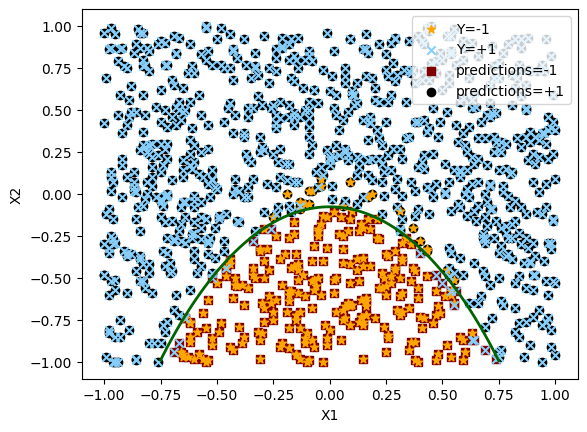

In [ ]:
# c(iv)

w1,w2,w3,w4 = LRmodel.coef_.T
interC = LRmodel.intercept_

def find_X2(value):
  # fix x1
  a = w4
  B = w2
  c = w1*value + w3*(value**2) + interC

  # Find determinant
  D = (B**2) - (4*a*c)
  if D < 0:
    return None
  else:
    r1 = (-B+np.sqrt(D)) / (2*a)
    r2 = (-B-np.sqrt(D)) / (2*a)
    # check root range
    if r1 >= -1 and r1 <= 1:
      return r1
    else:
      return r2

x1_point = np.linspace(-0.75,0.75, 100)

x2_root = []
for x in x1_point:
  root = find_X2(x)
  if root is not None:
    x2_root.append(root)

x2_root = np.array(x2_root)

predict_N = plt.scatter(X1[new_predict<0],X2[new_predict<0], marker='s', color='maroon',label='predictions=-1')
predict_P = plt.scatter(X1[new_predict>0],X2[new_predict>0], marker='o', color='black', label='predictions=+1')
input_N = plt.scatter(X1[y<0],X2[y<0], marker='*', color='orange',label='Y=-1')
input_P = plt.scatter(X1[y>0],X2[y>0], marker='x', color='lightskyblue', label='Y=+1')

plt.xlabel("X1")
plt.ylabel("X2")
plt.plot(x1_point,x2_root ,c="darkgreen",lw=2)
plt.legend(handles=[input_N,input_P, predict_N, predict_P], loc="upper right")

plt.show()
